# Rainfall Prediction in Australia using Artificial Neural Networks

**Authors:** Himanshu Agarwal (055013) and Pratyaksh Chauhan (055031)

## 1. Introduction

This report details the development and evaluation of an Artificial Neural Network (ANN) model for predicting rainfall in Australia. Accurate rainfall prediction is crucial for various sectors, including agriculture, water resource management, and disaster preparedness. This project aims to build a predictive model using historical weather data to forecast whether or not it will rain on a given day.

## 2. Dataset

The dataset used in this project is the "weatherAUS.csv" dataset, which contains historical weather observations from various locations across Australia. The dataset includes daily measurements of temperature, rainfall, wind speed, humidity, pressure, and other relevant weather parameters.

### 2.1. Data Description

Each row in the dataset represents a daily weather observation. The columns include:

*   **Date:** The date of the observation.
*   **Location:** The name of the weather station location.
*   **MinTemp:** The minimum temperature in degrees Celsius.
*   **MaxTemp:** The maximum temperature in degrees Celsius.
*   **Rainfall:** The amount of rainfall recorded for the day in millimeters.
*   **Evaporation:** The amount of evaporation recorded for the day in millimeters.
*   **Sunshine:** The number of hours of bright sunshine for the day.
*   **WindGustDir:** The direction of the strongest wind gust in the 24 hours before midnight.
*   **WindGustSpeed:** The speed of the strongest wind gust in the 24 hours before midnight in kilometers per hour.
*   **WindDir9am:** The wind direction at 9am.
*   **WindDir3pm:** The wind direction at 3pm.
*   **WindSpeed9am:** The wind speed at 9am in kilometers per hour.
*   **WindSpeed3pm:** The wind speed at 3pm in kilometers per hour.
*   **Humidity9am:** The humidity at 9am as a percentage.
*   **Humidity3pm:** The humidity at 3pm as a percentage.
*   **Pressure9am:** The pressure at 9am in hectopascals.
*   **Pressure3pm:** The pressure at 3pm in hectopascals.
*   **Cloud9am:** The amount of cloud cover at 9am in oktas.
*   **Cloud3pm:** The amount of cloud cover at 3pm in oktas.
*   **Temp9am:** The temperature at 9am in degrees Celsius.
*   **Temp3pm:** The temperature at 3pm in degrees Celsius.
*   **RainToday:** A binary variable indicating whether or not it rained on the day.
*   **RainTomorrow:** The target variable: A binary variable indicating whether or not it will rain the next day.

## 3. Data Exploration and Preprocessing

Before building the model, the data was thoroughly explored and preprocessed. This involved handling missing values, encoding categorical variables, and scaling numerical features.

### 3.1. Missing Value Handling

The dataset contains missing values in several columns. These missing values were imputed using the median value for numerical columns. This approach preserves the distribution of the data while filling in the missing entries.

### 3.2. Categorical Feature Encoding

Several columns in the dataset contain categorical data (e.g., Location, WindGustDir, RainToday). These categorical features were converted into numerical data using Label Encoding. This allows the ANN model to process the categorical information.

### 3.3. Feature Engineering

New features were created from the `Date` column: `year`, `month`, and `day`.

### 3.4. Feature Scaling

Numerical features were scaled using `StandardScaler` to have zero mean and unit variance. This is important for ANN models, as it helps to improve the training process and prevent features with larger values from dominating the model.

## 4. Model Development

An artificial neural network (ANN) model was developed to predict rainfall. The model architecture, training process, and hyperparameter tuning are described below.

### 4.1. Model Architecture

The ANN model consists of multiple fully connected (dense) layers with ReLU activation functions. A dropout layer is added after each hidden layer to prevent overfitting. The output layer uses a sigmoid activation function to produce a probability score between 0 and 1, representing the likelihood of rainfall tomorrow.

The specific architecture of the model is as follows:

*   Input Layer: (Number of features)
*   Hidden Layer 1: (Number of neurons, ReLU activation)
*   Dropout Layer: (Dropout rate)
*   Hidden Layer 2: (Number of neurons, ReLU activation)
*   Dropout Layer: (Dropout rate)
*   Output Layer: 1 neuron, Sigmoid activation

### 4.2. Training Process

The model was trained using the Adam optimizer and binary cross-entropy loss function. The training data was split into training and validation sets to monitor the model's performance and prevent overfitting.

*   Optimizer: Adam
*   Loss Function: Binary Cross-Entropy
*   Batch Size: (Value)
*   Epochs: (Value)
*   Validation Split: 20%

### 4.3. Hyperparameter Tuning

Several hyperparameters were tuned to optimize the model's performance. These included the learning rate, batch size, number of layers, number of neurons per layer, and dropout rate. The best combination of hyperparameters was determined through experimentation and evaluation on the validation set.

The following hyperparameters were explored:

*   Learning Rate: (Range of values)
*   Batch Size: (List of values)
*   Number of Layers: (Range of values)
*   Neurons per Layer: (Range of values)
*   Dropout Rate: (Range of values)

## 5. Results and Evaluation

The performance of the ANN model was evaluated using several metrics, including accuracy, precision, recall, F1-score, and confusion matrix. These metrics provide a comprehensive assessment of the model's ability to accurately predict rainfall.

### 5.1. Performance Metrics

*   Accuracy: (Value)
*   Precision: (Value)
*   Recall: (Value)
*   F1-Score: (Value)

### 5.2. Confusion Matrix

\[Insert Confusion Matrix Here]

The confusion matrix provides a detailed breakdown of the model's predictions, showing the number of true positives, true negatives, false positives, and false negatives.

### 5.3. Visualizations

Relevant visualizations were created to further analyze the model's performance and gain insights into the data. These may include:

*   Accuracy and Loss Plots
*   Rainfall Distribution
*   Average Rainfall by Location
*   Rainfall Map of Australia

## 6. Conclusion

The ANN model developed in this project demonstrates promising results for predicting rainfall in Australia. The model achieves a high level of accuracy and provides valuable insights into the factors that influence rainfall patterns.

### 6.1. Future Work

Potential areas for future work include:

*   Exploring different model architectures and algorithms.
*   Incorporating additional weather data and features.
*   Developing a real-time rainfall prediction system.
*   Evaluate with different evaluation metrics

This report provides a comprehensive overview of the rainfall prediction project, including the data, methods, results, and conclusions. The findings of this project can be used to improve rainfall forecasting and support decision-making in various sectors.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import (
    precision_score, recall_score, confusion_matrix,
    classification_report, accuracy_score, f1_score
)
from keras import callbacks

np.random.seed(0)

In [32]:
# prompt: import dataset from google drive. the link for the file is: https://drive.google.com/file/d/1Iu1noqdA_TyzyWLubI2vLzzjonKIioZr/view?usp=sharing the file is a csv file, i dont know the file path

import pandas as pd
import requests
from io import StringIO

# Download the CSV file from Google Drive using the shared link
url = 'https://drive.google.com/uc?id=1Iu1noqdA_TyzyWLubI2vLzzjonKIioZr&export=download'  # Replace with your actual file ID
response = requests.get(url)
response.raise_for_status()  # Check for errors

# Read the CSV data into a pandas DataFrame
csv_data = StringIO(response.text)
data = pd.read_csv(csv_data)


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [34]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<ipython-input-35-9f925fcff129>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= data["RainTomorrow"], palette= cols)


<Axes: xlabel='RainTomorrow', ylabel='count'>

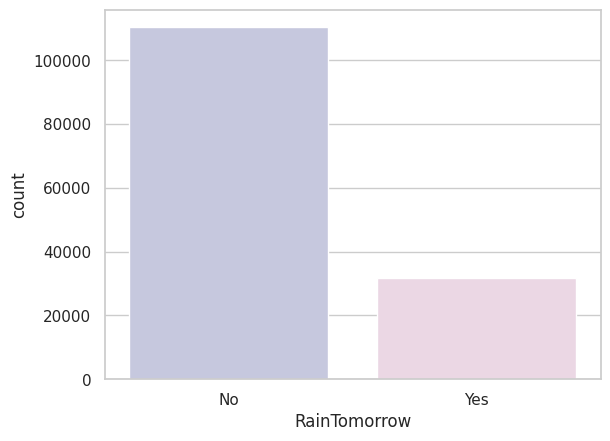

In [35]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

In [38]:
corrmat = data.select_dtypes(include=['number']).corr()

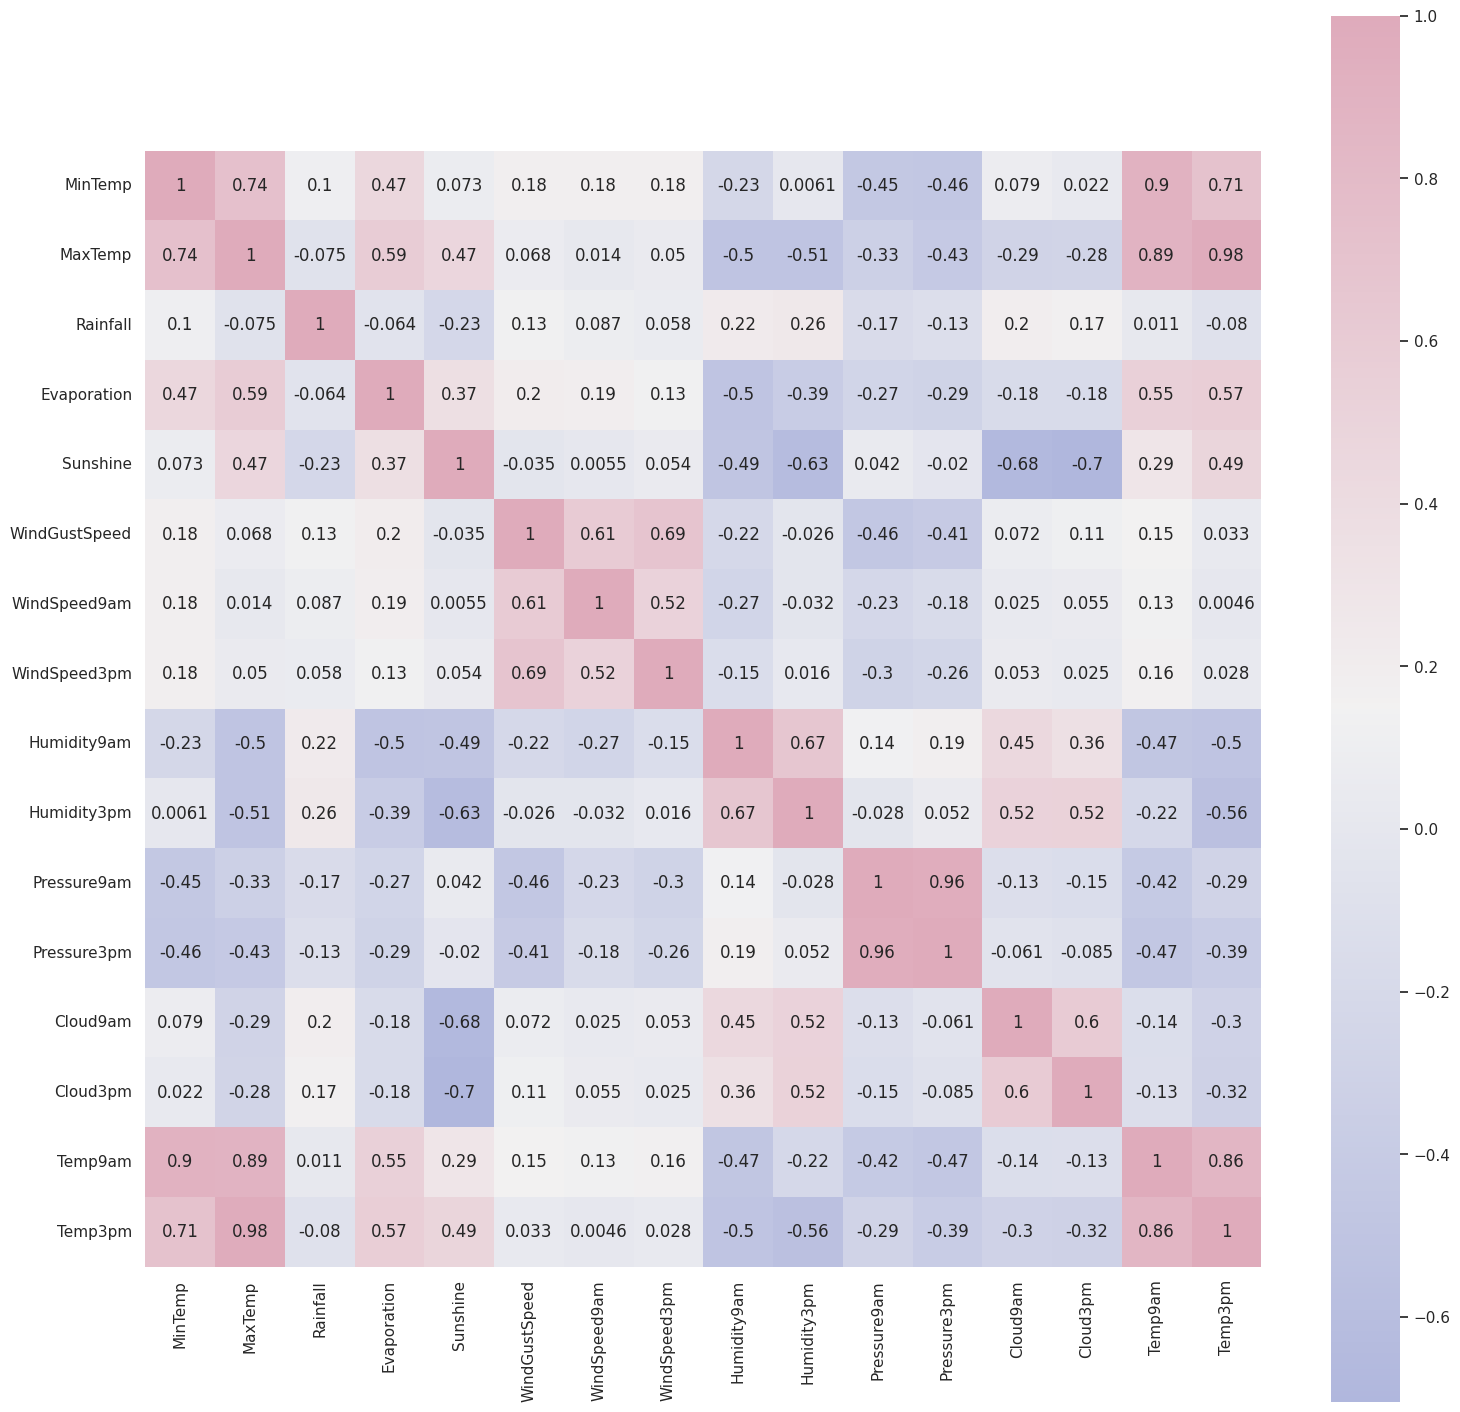

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)

plt.figure(figsize=(18,18))
sns.heatmap(corrmat, cmap=cmap, annot=True, square=True)
plt.show()

In [42]:
#Parsing datetime
#exploring the length of date objects
lengths = data["Date"].str.len()
lengths.value_counts()

,count
Date,
10,145460


In [43]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year

# function to encode datetime into cyclic parameters.
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature.

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,-2.449294e-16,1.0,1,0.201299,0.979530
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,-2.449294e-16,1.0,2,0.394356,0.918958
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,-2.449294e-16,1.0,3,0.571268,0.820763
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,-2.449294e-16,1.0,4,0.724793,0.688967
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,-2.449294e-16,1.0,5,0.848644,0.528964


Text(0.5, 0, 'Days In Year')

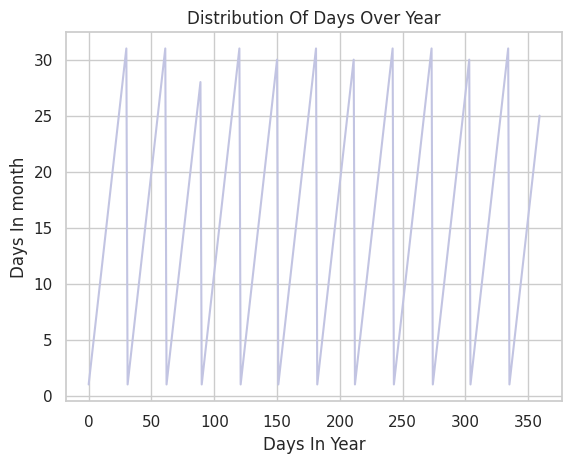

In [44]:
# roughly a year's span section
section = data[:360]
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

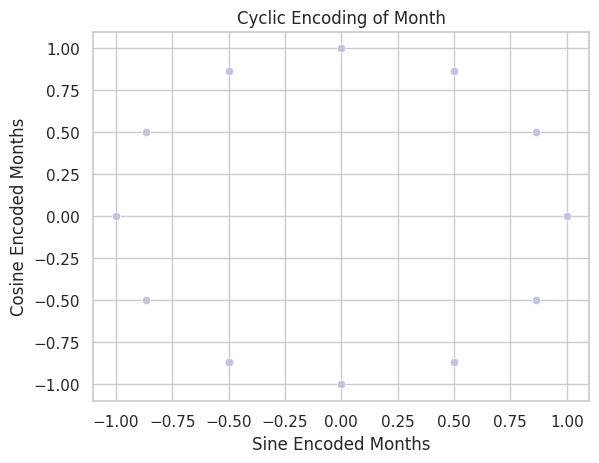

In [45]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

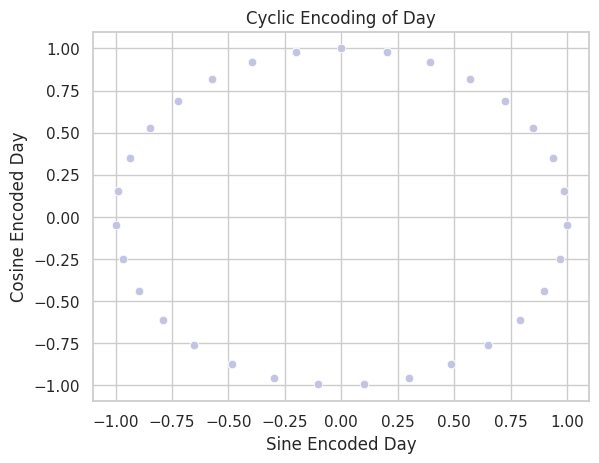

In [46]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

In [47]:
# Get list of categorical variables
s = (data.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [48]:
# Missing values in categorical variables

for i in object_cols:
    print(i, data[i].isnull().sum())


Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [49]:
# Filling missing values with mode of the column in value

for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

<ipython-input-49-c47c2d6da7f2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace=True)


In [50]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [51]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [52]:
# Filling missing values with median of the column in value

for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

<ipython-input-52-4b03adfd6c01>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(), inplace=True)


In [53]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int64         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int64         
 10  WindDir3pm     145460 non-null  int64         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [54]:
# Prepairing attributes of scale data

features = data.drop(['RainTomorrow', 'Date','day', 'month'], axis=1) # dropping target and extra columns

target = data['RainTomorrow']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,145460.0,7.815677e-18,1.000003,-1.672228,-0.899139,0.014511,0.857881,1.701250
MinTemp,145460.0,-4.501830e-16,1.000003,-3.250525,-0.705659,-0.030170,0.723865,3.410112
MaxTemp,145460.0,3.001220e-16,1.000003,-3.952405,-0.735852,-0.086898,0.703133,3.510563
Rainfall,145460.0,7.815677e-18,1.000003,-0.275097,-0.275097,-0.275097,-0.203581,43.945571
Evaporation,145460.0,-3.282584e-17,1.000003,-1.629472,-0.371139,-0.119472,0.006361,43.985108
Sunshine,145460.0,-5.424080e-16,1.000003,-2.897217,0.076188,0.148710,0.257494,2.360634
WindGustDir,145460.0,6.252542e-18,1.000003,-1.724209,-0.872075,0.193094,1.045228,1.471296
WindGustSpeed,145460.0,1.824961e-16,1.000003,-2.588407,-0.683048,-0.073333,0.460168,7.243246
WindDir9am,145460.0,7.190423e-17,1.000003,-1.550000,-0.885669,0.000105,0.885879,1.771653
WindDir3pm,145460.0,8.284618e-17,1.000003,-1.718521,-0.837098,0.044324,0.925747,1.586813


<ipython-input-55-6d42aad80754>:5: UserWarning: 
The palette list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


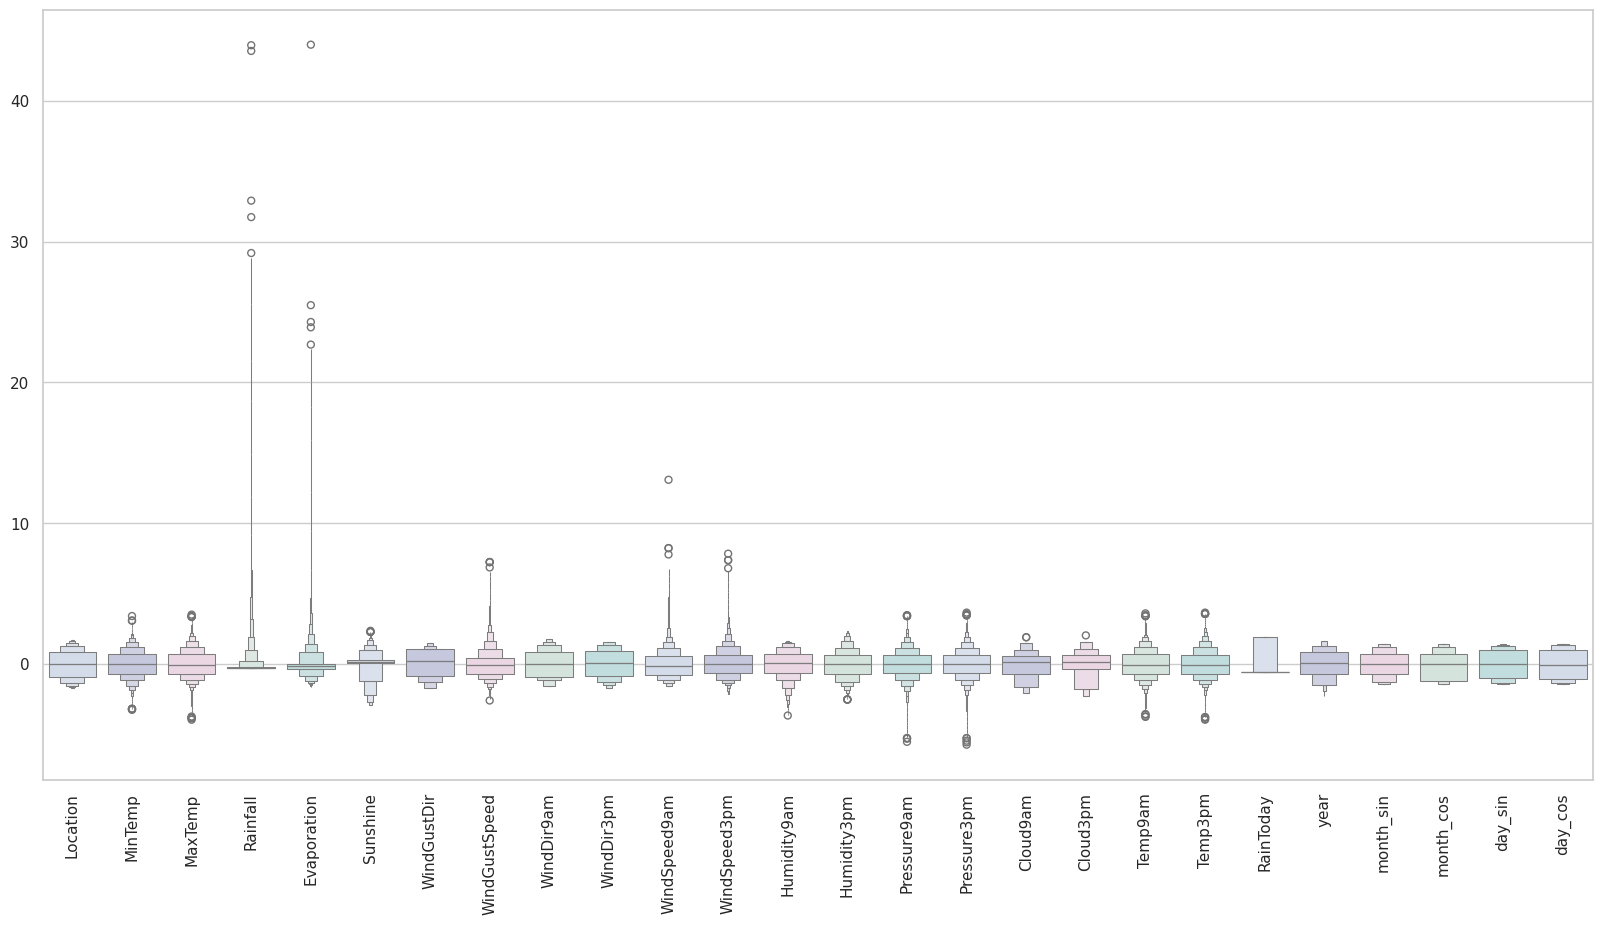

In [55]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [56]:
#full data for
features["RainTomorrow"] = target

#Dropping with outlier

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]


features.shape

(127536, 27)

<ipython-input-57-0b9d7aa52ee8>:4: UserWarning: 
The palette list has fewer values (5) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


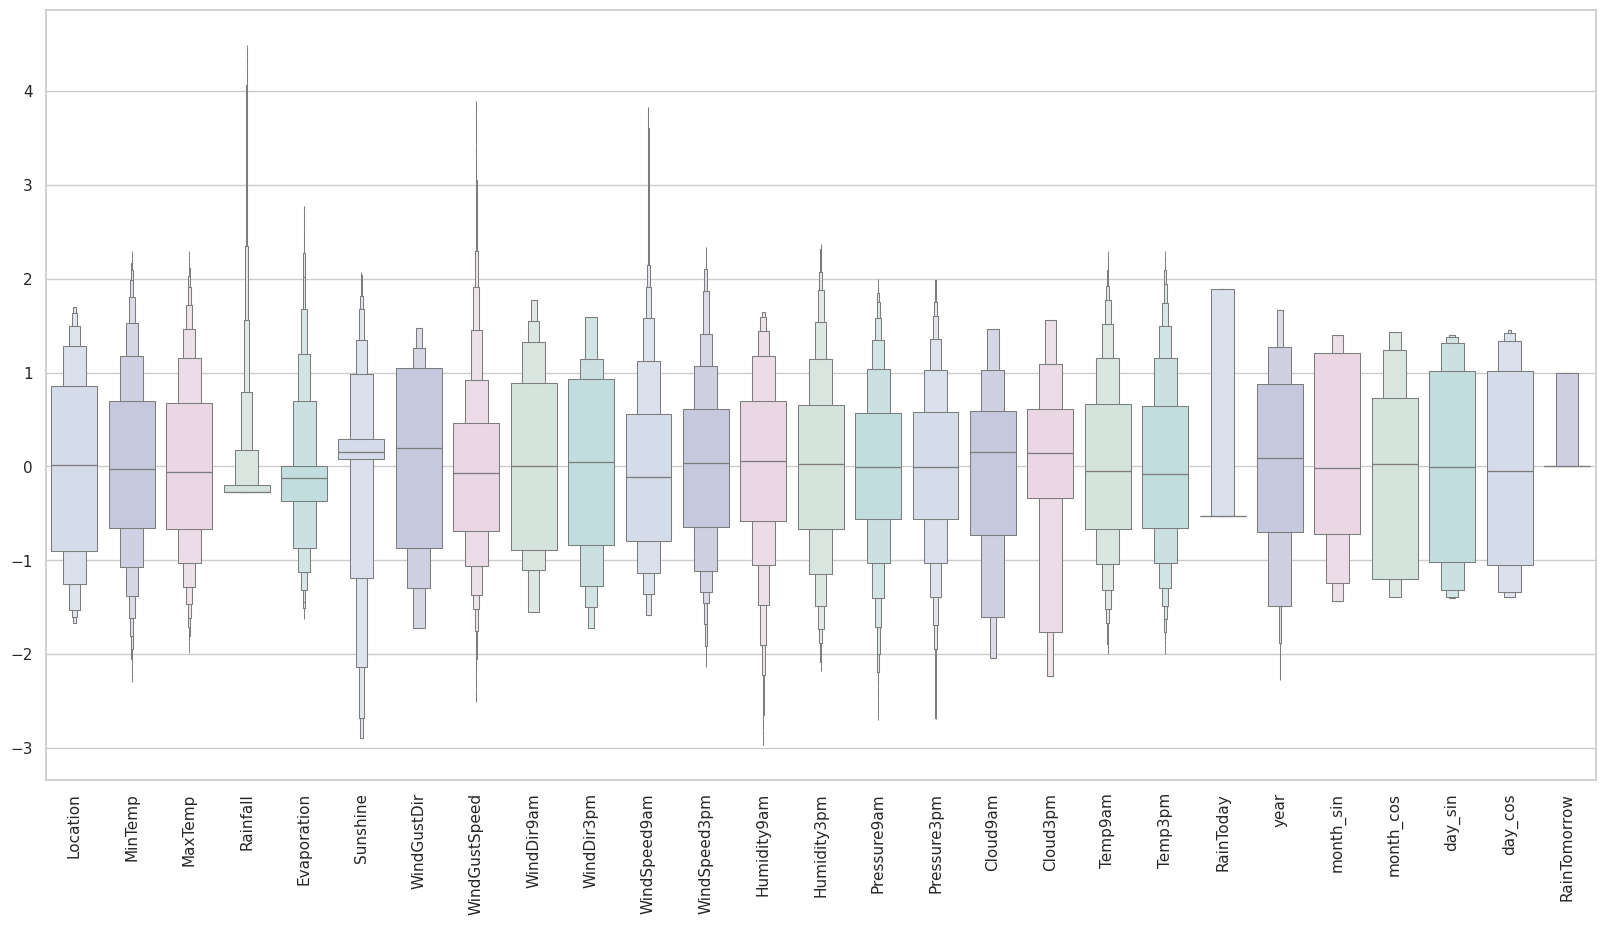

In [57]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [58]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127536, 26)

In [59]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7848 - loss: 0.5520 - val_accuracy: 0.7861 - val_loss: 0.3912
Epoch 2/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8189 - loss: 0.4145 - val_accuracy: 0.8386 - val_loss: 0.3795
Epoch 3/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8266 - loss: 0.4008 - val_accuracy: 0.8405 - val_loss: 0.3713
Epoch 4/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.8270 - loss: 0.3981 - val_accuracy: 0.8429 - val_loss: 0.3676
Epoch 5/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8336 - loss: 0.3904 - val_accuracy: 0.8427 - val_loss: 0.3658
Epoch 6/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8328 - loss: 0.3882 - val_accuracy: 0.8437 - val_loss: 0.3638
Epoch 7/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8337 - loss: 0.3872 - val_accuracy: 0.8439 - val_loss: 0.3636
Epoch 8/150
2551/2551 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8331 - los

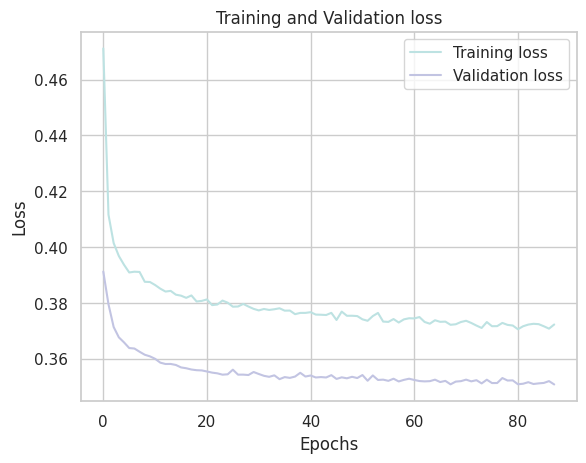

In [60]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

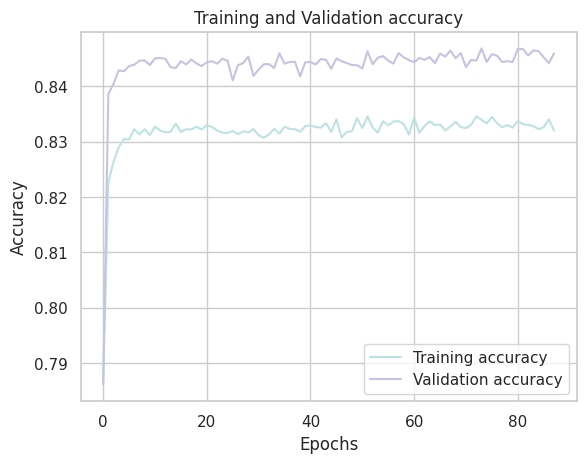

In [61]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Axes: >

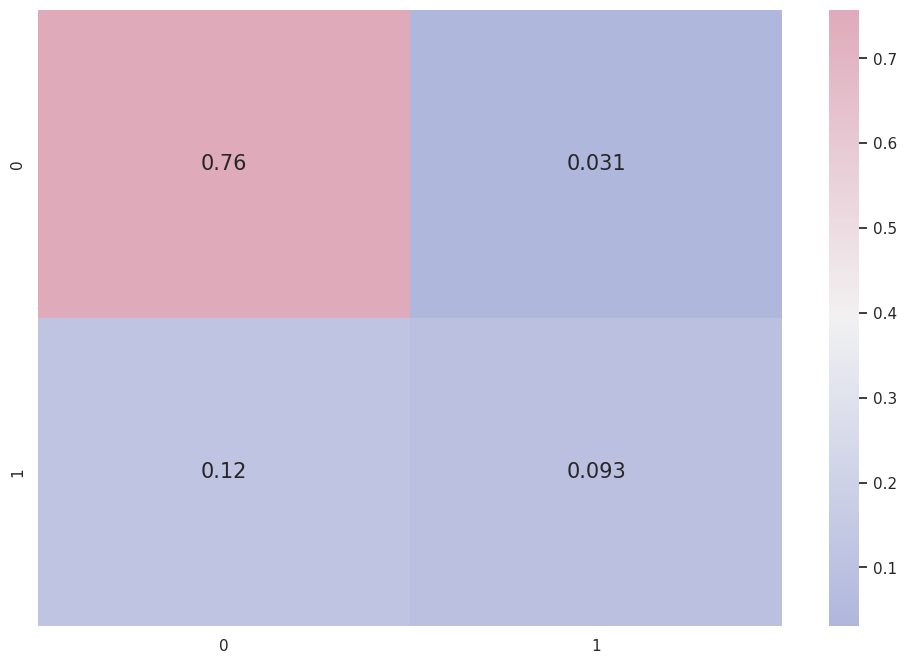

In [63]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [64]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91     20110
           1       0.75      0.44      0.55      5398

    accuracy                           0.85     25508
   macro avg       0.81      0.70      0.73     25508
weighted avg       0.84      0.85      0.83     25508

